# **Medical_Insurance_Cost_Prediction KNN Project**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor #(BEcause this is Regression problem Continous values in Target Column)
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1) Problem Statement

In [76]:
# To predict Medical Insurance charges based on following features
# 'age', 'sex', 'bmi', 'children', 'smoker', 'region'

## 2) Data Gathering

In [77]:
df = pd.read_csv(r"C:\Users\hp\Downloads\medical_insurance.csv")
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## 3) Exploratory Data Analysis (EDA ) OR DQ check

#### - - column wise analysis

In [78]:
df.shape

(1338, 7)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [80]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [81]:
df['sex'].unique()

array(['female', 'male', 'Female', 'MALE'], dtype=object)

In [82]:
df['sex'] = df['sex'].str.lower() #Convert all strings in lowercase()

In [83]:
df['sex'].unique() 

array(['female', 'male'], dtype=object)

In [84]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [85]:
for i in df.columns:
    if i =='age' or i== 'bmi' or i=='charges':
        continue
    print(df[i].unique())

['female' 'male']
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [86]:
df['charges'].unique().tolist()

[16884.924,
 1725.5523,
 4449.462,
 21984.47061,
 3866.8552,
 3756.6216,
 8240.5896,
 7281.5056,
 6406.4107,
 28923.13692,
 2721.3208,
 27808.7251,
 1826.843,
 11090.7178,
 39611.7577,
 1837.237,
 10797.3362,
 2395.17155,
 10602.385,
 36837.467,
 13228.84695,
 4149.736,
 1137.011,
 37701.8768,
 6203.90175,
 14001.1338,
 14451.83515,
 12268.63225,
 2775.19215,
 38711.0,
 35585.576,
 2198.18985,
 4687.797,
 13770.0979,
 51194.55914,
 1625.43375,
 15612.19335,
 2302.3,
 39774.2763,
 48173.361,
 3046.062,
 4949.7587,
 6272.4772,
 6313.759,
 6079.6715,
 20630.28351,
 3393.35635,
 3556.9223,
 12629.8967,
 38709.176,
 2211.13075,
 3579.8287,
 23568.272,
 37742.5757,
 8059.6791,
 47496.49445,
 13607.36875,
 34303.1672,
 23244.7902,
 5989.52365,
 8606.2174,
 4504.6624,
 30166.61817,
 4133.64165,
 14711.7438,
 1743.214,
 14235.072,
 6389.37785,
 5920.1041,
 17663.1442,
 16577.7795,
 6799.458,
 11741.726,
 11946.6259,
 7726.854,
 11356.6609,
 3947.4131,
 1532.4697,
 2755.02095,
 6571.02435,
 4441

In [87]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [88]:
pd.DataFrame({'Missing Values':df.isna().sum(),'Missing Count':df.isna().mean()})

,Missing Values,Missing Count
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [89]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

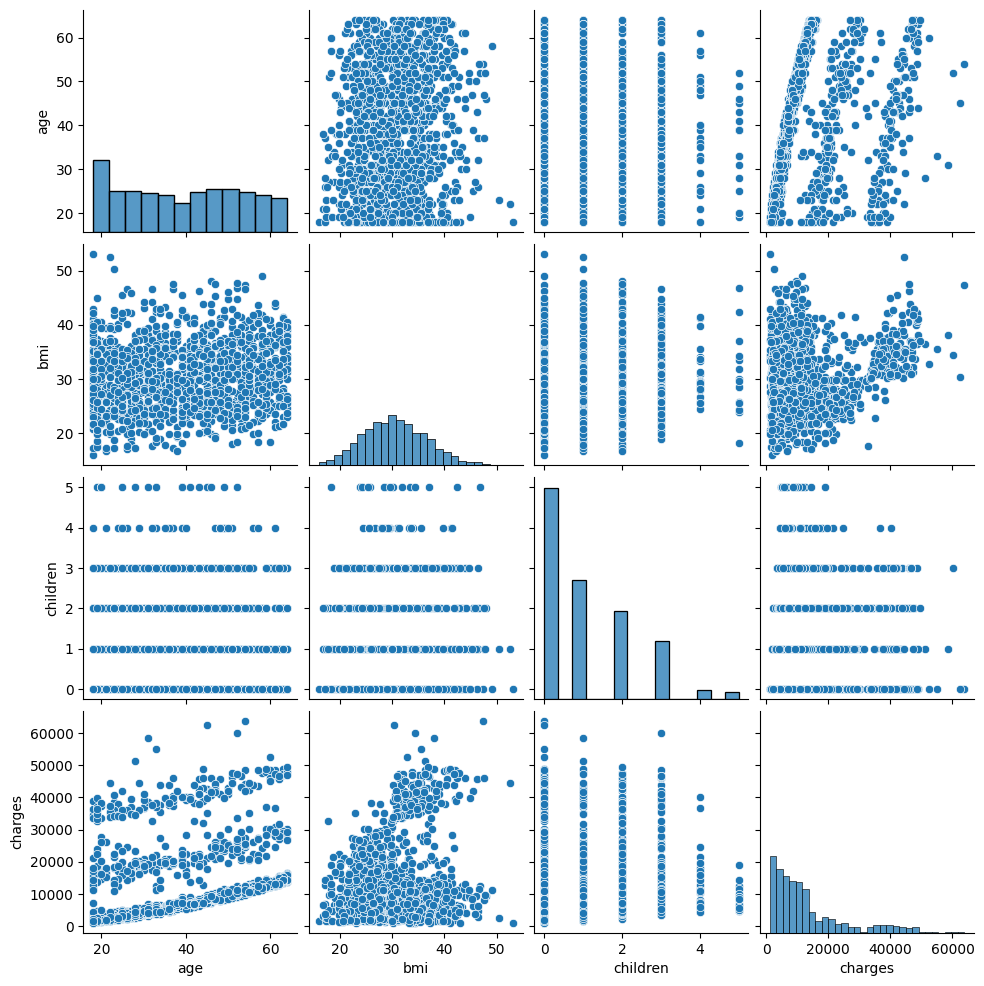

In [90]:
sns.pairplot(df)

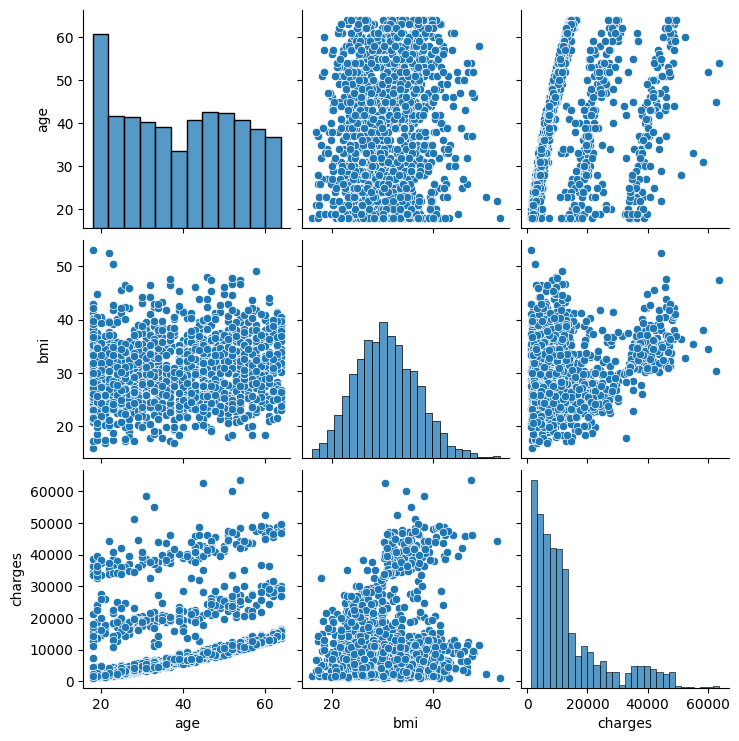

In [91]:
sns.pairplot(df,vars=['age','bmi','charges'])

<Axes: xlabel='age', ylabel='charges'>

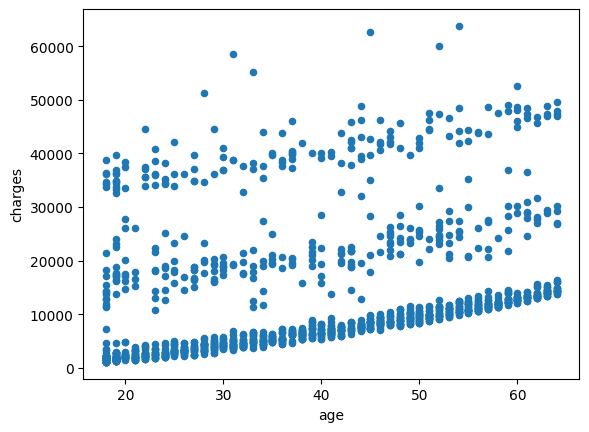

In [92]:
df.plot(x='age',y='charges',kind='scatter')

In [93]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='smoker', ylabel='charges'>

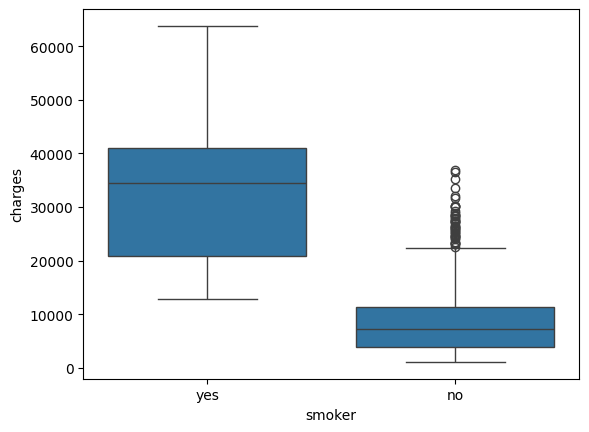

In [94]:
sns.boxplot(df,x='smoker',y='charges')

In [95]:
df[(df['smoker']=='no') & (df['charges']>=20000)]['age'].min()
df[(df['smoker']=='no') & (df['charges'] >=20000)]['age'].max()

64

In [96]:
df[(df['smoker']=='no') &(df['charges'] >= 20000) & (df['age'] ==18)]

,age,sex,bmi,children,smoker,region,charges
102,18,female,30.115,0,no,northeast,21344.8467


<Axes: xlabel='region', ylabel='charges'>

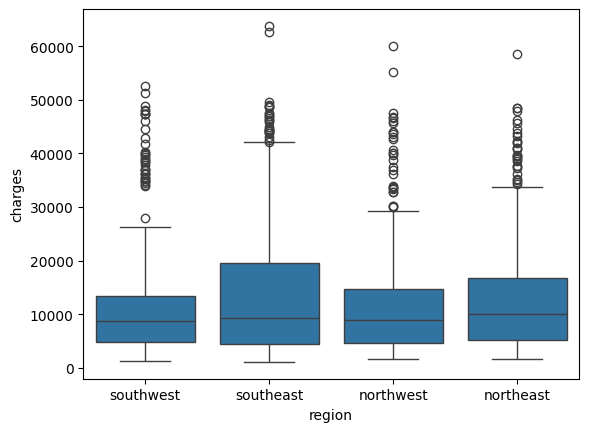

In [97]:
sns.boxplot(df,x='region',y='charges') #Highest chrages in southeast

In [98]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [99]:
# count of female and male region wise

In [100]:
#pd.crosstab(rows,index,margins=True) #Margins=True...... adds the total
pd.crosstab(df['sex'],df['region'],margins=True)

region,northeast,northwest,southeast,southwest,All
sex,,,,,
female,161,164,175,162,662
male,163,161,189,163,676
All,324,325,364,325,1338


In [101]:
pd.crosstab(df['region'],df['age'])

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
region,,,,,,,,,,,,,,,,,,,,,
northeast,32,0,6,7,7,7,7,7,7,7,...,6,7,7,6,6,6,6,6,5,4
northwest,0,34,7,7,7,7,7,7,7,6,...,6,6,7,7,5,5,6,6,6,5
southeast,37,3,8,7,8,7,7,7,7,9,...,7,6,6,6,8,6,5,6,6,8
southwest,0,31,8,7,6,7,7,7,7,6,...,7,7,6,6,6,6,6,5,6,5


In [102]:
df.groupby('region').agg(value_cnt = ('region','value_counts')).reset_index()

,region,value_cnt
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


In [103]:
df.groupby('age').agg(region_count=('region','value_counts')).reset_index()

,age,region,region_count
0,18,southeast,37
1,18,northeast,32
2,19,northwest,34
3,19,southwest,31
4,19,southeast,3
...,...,...,...
180,63,northeast,5
181,64,southeast,8
182,64,northwest,5
183,64,southwest,5


In [104]:
df[df['region']=='northeast']['age'].min(),df[df['region']=='northeast']['age'].max()

(18, 64)

In [105]:
df.groupby('region').agg(age_Min = ('age','min'),
                         age_Max = ('age','max'))

,age_Min,age_Max
region,,
northeast,18,64
northwest,19,64
southeast,18,64
southwest,19,64


In [106]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [107]:
df1 = df[(df['sex']=='female') & (df['smoker']=='yes')]
np.average(df1['charges'])

30678.996276260867

In [108]:
df1= df[(df['sex']=='female') & (df['smoker']=='no')]
np.average(df1['charges'])

8762.297299541133

In [109]:
df1 = df[(df['sex']=='male') & (df['smoker']=='yes')]
np.average(df1['charges'])

33042.00597528303

In [110]:
df1 = df[(df['sex']=='male') & (df['smoker']=='yes')]
np.average(df1['charges'])

33042.00597528303

In [111]:
df.pivot_table(index = 'sex',columns = 'smoker',values = 'charges') #By default average

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8087.204731,33042.005975


In [112]:
pivot=pd.pivot_table(df,index='region',columns='smoker',values='charges',aggfunc='sum')
pivot

smoker,no,yes
region,,
northeast,2.355542e+06,1.988127e+06
northwest,2.284576e+06,1.751136e+06
southeast,2.192795e+06,3.170895e+06
southwest,2.141149e+06,1.871606e+06


In [113]:
data = {
    'Region': ['Northeast', 'Northeast', 'Northwest', 'Northwest', 'Southeast', 'Southeast', 'Southwest', 'Southwest'],
    'Sex': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Sales': [161, 163, 164, 161, 175, 189, 162, 163]
}
a=pd.DataFrame(data)
pd.pivot_table(a,index='Region',columns='Sex',values='Sales')

Sex,Female,Male
Region,,
Northeast,161.0,163.0
Northwest,164.0,161.0
Southeast,175.0,189.0
Southwest,162.0,163.0


In [114]:
# - female and male 
# female : smoker : min and max
# male : smoker : min and max
# female : nonsmoker : min and max
# male : nonsmoker : min and max

In [115]:
df.pivot_table(index='sex',columns='smoker',values='charges',aggfunc=['min','max'])

min                      max             
smoker         no         yes           no          yes
sex                                                    
female  1607.5101  13844.5060  36910.60803  63770.42801
male    1121.8739  12829.4551  32108.66282  62592.87309

In [116]:
df.pivot_table(index='region',columns='sex',values='charges',aggfunc=['min','max'])

min                     max             
sex            female       male       female         male
region                                                    
northeast  2196.47320  1694.7964  58571.07448  48549.17835
northwest  2117.33885  1621.3402  55135.40209  60021.39897
southeast  1607.51010  1121.8739  63770.42801  62592.87309
southwest  1727.78500  1241.5650  48824.45000  52590.82939

## **4. Feature Engineering**

In [117]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [118]:
df1=df.copy()
df1.drop('sex',axis=1,inplace=True)  #Drop 'sex' columsn

In [119]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [120]:
df1['smoker']=df1['smoker'].replace({'yes':1,'no':0})

In [121]:
df1['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [122]:
df1.head(1)

,age,bmi,children,smoker,region,charges
0,19,27.9,0,1,southwest,16884.924


## **Encoding**

In [123]:
df1.shape

(1338, 6)

In [124]:
df2=pd.get_dummies(df1,columns=['region'],dtype='int')
df2.shape

(1338, 9)

In [125]:
df2.head(1)

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,16884.924,0,0,0,1


In [126]:
bins=[0,18,30,45,60,np.inf]
labels=[0,1,2,3,4]
df2['age_buckets'] = pd.cut(df2['age'],bins=bins,labels=labels,include_lowest=True,right=False) 
#Means in (18-30):18 include and exclude 30 & 0-18:0 include & 18 exclude
df2[['age','age_buckets']]

,age,age_buckets
0,19,1
1,18,1
2,28,1
3,33,2
4,32,2
...,...,...
1333,50,3
1334,18,1
1335,18,1
1336,21,1


In [127]:
df2.head(1)

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets
0,19,27.9,0,1,16884.924,0,0,0,1,1


In [128]:
df2['risk']=np.where(df2['age_buckets'].isin([4]),1,0)
df2['risk'].value_counts()

risk
0    1224
1     114
Name: count, dtype: int64

In [129]:
df2['weight']=df2['bmi'].apply(lambda x:1 if x>25 else 0)  #Take 1 by 1 values in 'bmi' columsn
df2['weight'].value_counts()

weight
1    1091
0     247
Name: count, dtype: int64

In [130]:
df2.head(1)

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,risk,weight
0,19,27.9,0,1,16884.924,0,0,0,1,1,0,1


## **5. Feature Selection**

In [131]:
df2.corr() #Correlation between 

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,risk,weight
age,1.000000,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016,0.956840,0.494898,0.091367
bmi,0.109272,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205,0.114041,0.067732,0.658534
children,0.042469,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914,0.033721,-0.126229,-0.008881
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945,-0.015869,0.024245,-0.021092
charges,0.299008,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210,0.295404,0.201118,0.117372
region_northeast,0.002475,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177,0.002299,-0.003783,-0.104273
region_northwest,-0.000407,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829,-0.001615,0.001932,-0.044938
region_southeast,-0.011642,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265,-0.009527,-0.000081,0.113396
region_southwest,0.010016,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000,0.009205,0.001932,0.031428
age_buckets,0.956840,0.114041,0.033721,-0.015869,0.295404,0.002299,-0.001615,-0.009527,0.009205,1.000000,0.578196,0.089135


<Axes: >

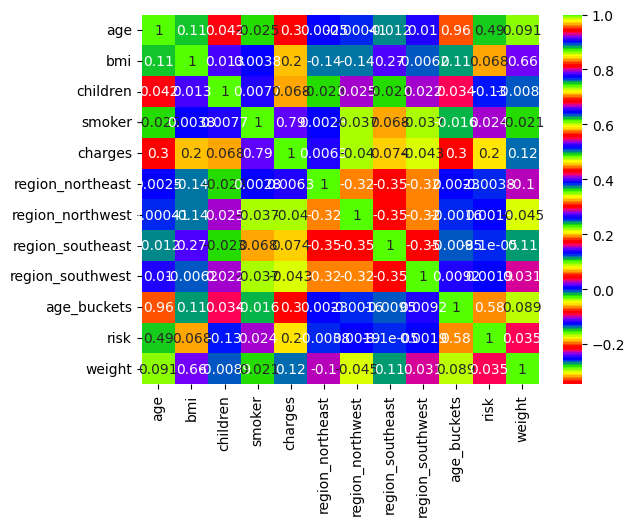

In [132]:
sns.heatmap(df2.corr(),annot=True,cmap='prism')

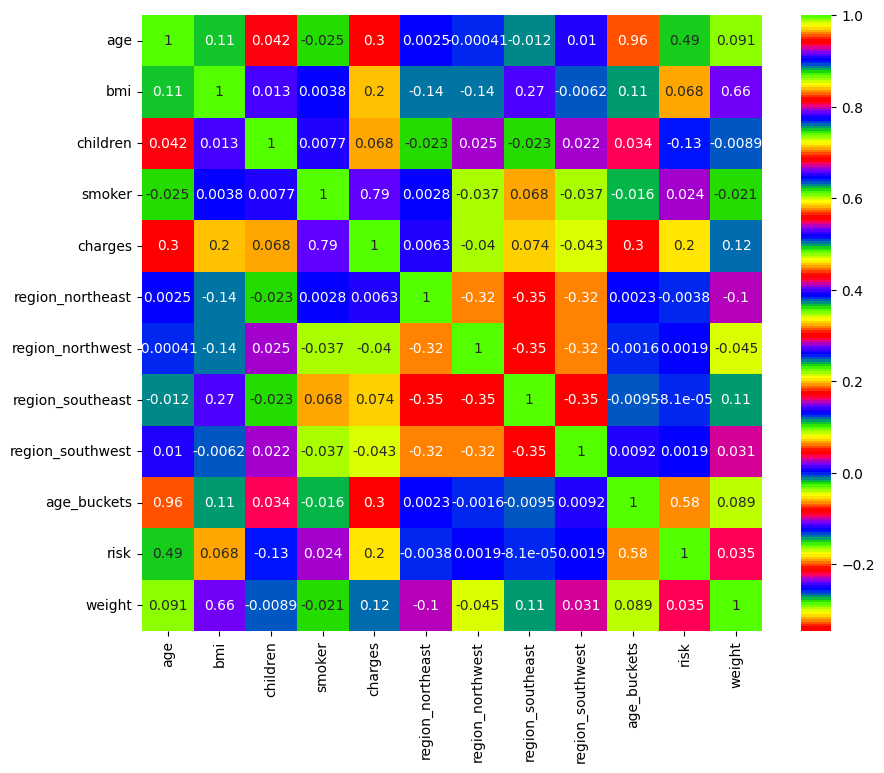

In [133]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True,cmap='prism')
plt.savefig("KNN_INsurance _df2cor.jpeg")

# **- Drop duplicated rows**

In [134]:
df2[df2.duplicated()].shape  #TO know duplicated rows...

(1, 12)

In [135]:
df3=df2[~df2.duplicated()] #To drop duplicate rows
df3.shape,df2.shape

((1337, 12), (1338, 12))

In [136]:
df3['smoker'].duplicated()

0       False
1       False
2        True
3        True
4        True
        ...  
1333     True
1334     True
1335     True
1336     True
1337     True
Name: smoker, Length: 1337, dtype: bool

In [137]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               1337 non-null   int64   
 1   bmi               1337 non-null   float64 
 2   children          1337 non-null   int64   
 3   smoker            1337 non-null   int64   
 4   charges           1337 non-null   float64 
 5   region_northeast  1337 non-null   int32   
 6   region_northwest  1337 non-null   int32   
 7   region_southeast  1337 non-null   int32   
 8   region_southwest  1337 non-null   int32   
 9   age_buckets       1337 non-null   category
 10  risk              1337 non-null   int32   
 11  weight            1337 non-null   int64   
dtypes: category(1), float64(2), int32(5), int64(4)
memory usage: 100.7 KB


In [138]:
df3.head(1) 

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,risk,weight
0,19,27.9,0,1,16884.924,0,0,0,1,1,0,1


In [139]:
df3['age_buckets']=df3['age_buckets'].astype('int')

In [140]:
df3['age_buckets'].dtype

dtype('int32')

In [141]:
df3.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'age_buckets', 'risk', 'weight'],
      dtype='object')

In [142]:
##We have to delete "age","bmi" columns becoz we have already taken age_buckets,weight

In [143]:
df3.drop(['age','bmi'],axis=1,inplace=True)
df3.shape

(1337, 10)

In [144]:
df3.columns

Index(['children', 'smoker', 'charges', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'age_buckets', 'risk',
       'weight'],
      dtype='object')

## **6. Model Training and data spliting**

In [145]:
x=df3.drop('charges',axis=1)
y=df3['charges']

In [146]:
# from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [147]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=47) #DO not pass stratify

### ###model training

In [148]:
knn_model1 = KNeighborsRegressor()
knn_model1.fit(x_train,y_train)

KNeighborsRegressor()

### ## Feature Scaling

## 1. StandardScaler

In [149]:
#from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [150]:
std_scaler = StandardScaler()
std_scaler.fit(x_train) #1st fit(x_train)
array = std_scaler.transform(x_train) #then Transform(x_train) 
std_x_train_df = pd.DataFrame(array,columns=x_train.columns) ## array is 1D we have to pass 2D array in data frame so use dataframe
std_x_train_df.head()

,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,risk,weight
0,-0.901379,-0.501753,-0.562586,-0.571229,1.635096,-0.564026,0.839464,-0.308686,0.482688
1,-0.901379,-0.501753,-0.562586,-0.571229,-0.611585,1.772967,0.839464,-0.308686,0.482688
2,-0.082013,-0.501753,-0.562586,-0.571229,-0.611585,1.772967,-0.195584,-0.308686,0.482688
3,-0.901379,1.993011,1.777508,-0.571229,-0.611585,-0.564026,-1.230633,-0.308686,0.482688
4,0.737352,-0.501753,-0.562586,-0.571229,1.635096,-0.564026,-1.230633,-0.308686,0.482688


In [151]:
knn_model_std = KNeighborsRegressor()
knn_model_std.fit(std_x_train_df,y_train)

KNeighborsRegressor()

## **Model Evaluation**

###  - On testing data

In [152]:
x_test.shape

(268, 9)

In [153]:
#### We are converting x_test data to Standardizationd data to udnerstand model becoz we train x_train on stdardization data

In [154]:
array = std_scaler.transform(x_test) #array is 1D
std_x_test_df = pd.DataFrame(array,columns=x_test.columns) #Pass 2D array

In [155]:
y_pred_knn = knn_model_std.predict(std_x_test_df)
MSE_KNN = mean_squared_error(y_test,y_pred_knn)
print('Mean Square Error of KNN= ',MSE_KNN)
RMSE_KNN = np.sqrt(MSE_KNN)
print('Root Mean Square Error of KNN= ',RMSE_KNN)

R2_Score_KNN = r2_score(y_test,y_pred_knn)
print('R2_Score of KNN= ',R2_Score_KNN)  #N= x_test rows & P=x_test columns

Adjusted_R2_KNN = 1-(((1-R2_Score_KNN)*(x_test.shape[0]-1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R2 score of KNN= ",Adjusted_R2_KNN)
### Adjusted_R2_score formula= 1- (((1-R2)*(N-1)) / (N-P-1))

Mean Square Error of KNN=  45772831.984722234
Root Mean Square Error of KNN=  6765.562207586465
R2_Score of KNN=  0.755652833045778
Adjusted R2 score of KNN=  0.747129094663654


### - On training side`

In [156]:
y_pred_train = knn_model_std.predict(std_x_train_df)
MSE_KNN = mean_squared_error(y_train,y_pred_train)
print('Mean Square Error of KNN= ',MSE_KNN)
RMSE_KNN = np.sqrt(MSE_KNN)
print('Root Mean Square Error of KNN= ',RMSE_KNN)

R2_Score_KNN = r2_score(y_train,y_pred_train)
print('R2_Score of KNN= ',R2_Score_KNN)  #N= x_test rows & P=x_test columns

Adjusted_R2_KNN = 1-(((1-R2_Score_KNN)*(x_train.shape[0]-1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R2 score of KNN= ",Adjusted_R2_KNN)
### Adjusted_R2_score formula= 1- (((1-R2)*(N-1)) / (N-P-1))

Mean Square Error of KNN=  30684720.654433504
Root Mean Square Error of KNN=  5539.379085640691
R2_Score of KNN=  0.7746597799824803
Adjusted R2 score of KNN=  0.7727447072911132


## HyperParameter Tuning

### **TO know what is Best value of "n_neighbors" We have other below method also....**
## -To know best R2_Score...
### -Below plot shoes R2_Score & n_neighbors value for both Training & Testing dataset.....

In [157]:
r2_train_list=[]
r2_test_list=[]
k_values = range(3,21)
for k in k_values:
    KNN_Reg =KNeighborsRegressor(n_neighbors=k,p=2) #I check for p=2 ,what is best value of "n_neghbors"
    KNN_Reg.fit(std_x_train_df,y_train)
    ### training side
    R2_train = KNN_Reg.score(std_x_train_df,y_train)
    r2_train_list.append(R2_train)
    ###testing side
    R2_test =KNN_Reg.score(std_x_test_df,y_test)
    r2_test_list.append(R2_test)

Text(0, 0.5, 'ACCURACY')

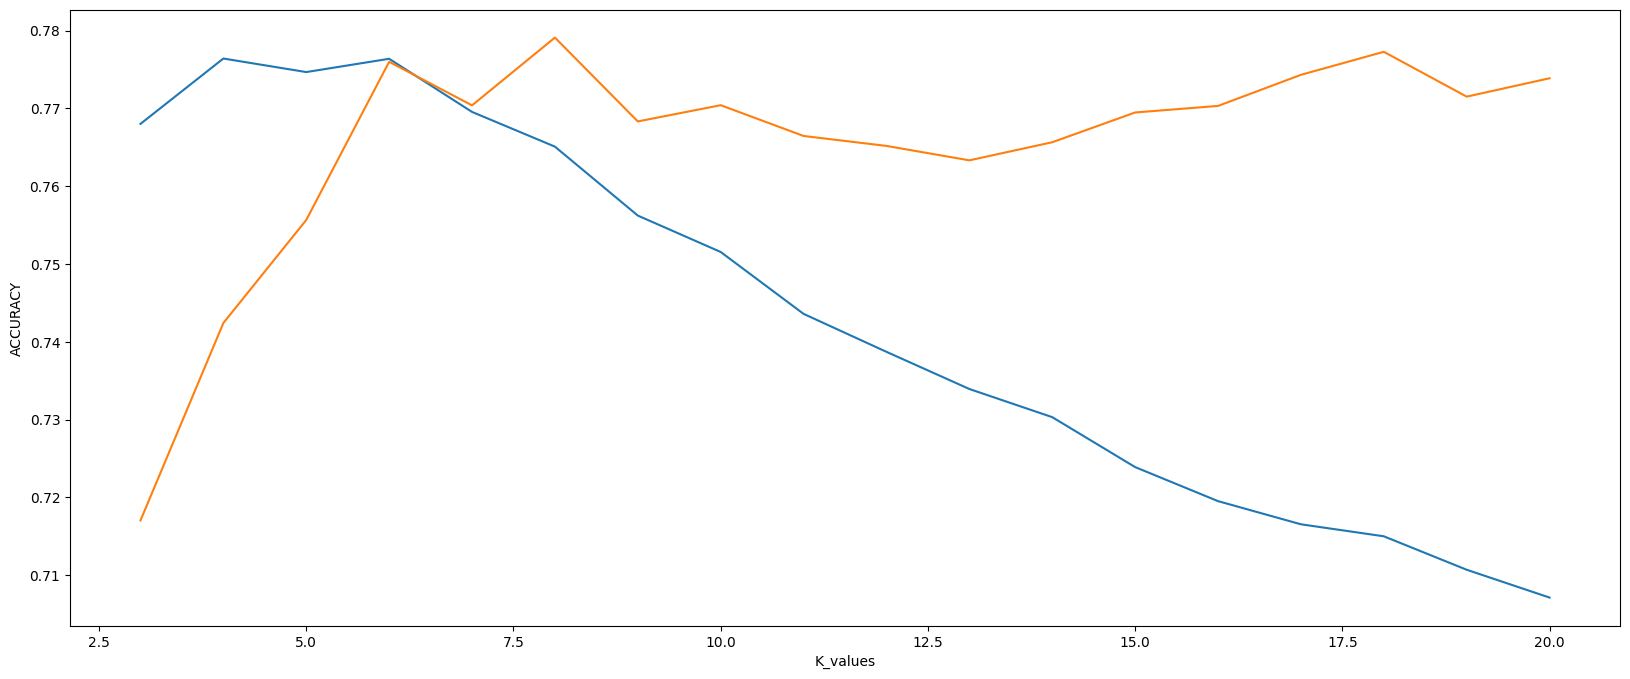

In [158]:
plt.figure(figsize=(20,8))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel('K_values')
plt.ylabel('ACCURACY')

- Based on the plot you provided, which shows accuracy (or 𝑅 2 R 2 ) values for both training and testing datasets over different n_neighbors values in a K-Nearest Neighbors (KNN) regression model: Optimal Value for 𝑠 n_neighbors: The best n_neighbors value is likely around k=6, as this is where the test accuracy reaches its highest point.
- Overfitting and Underfitting: After 𝑘 = 6 k=6, the test accuracy decreases, which suggests that higher values of n_neighbors may lead to underfitting.

In [159]:
r2_train_list1=[]
r2_test_list1=[]
k_values = range(3,21)
for i in k_values:
    KNN_Reg1 = KNeighborsRegressor(n_neighbors=i,p=1) #I check for p=1 ,what is best value of "n_neghbors"
    KNN_Reg1.fit(std_x_train_df,y_train)
    ### Training Side
    r2_train1 = KNN_Reg1.score(std_x_train_df,y_train)
    r2_train_list1.append(r2_train1)
    ### Testing SIde
    r2_test1=KNN_Reg1.score(std_x_test_df,y_test)
    r2_test_list1.append(r2_test1)

Text(0, 0.5, 'ACCURACY')

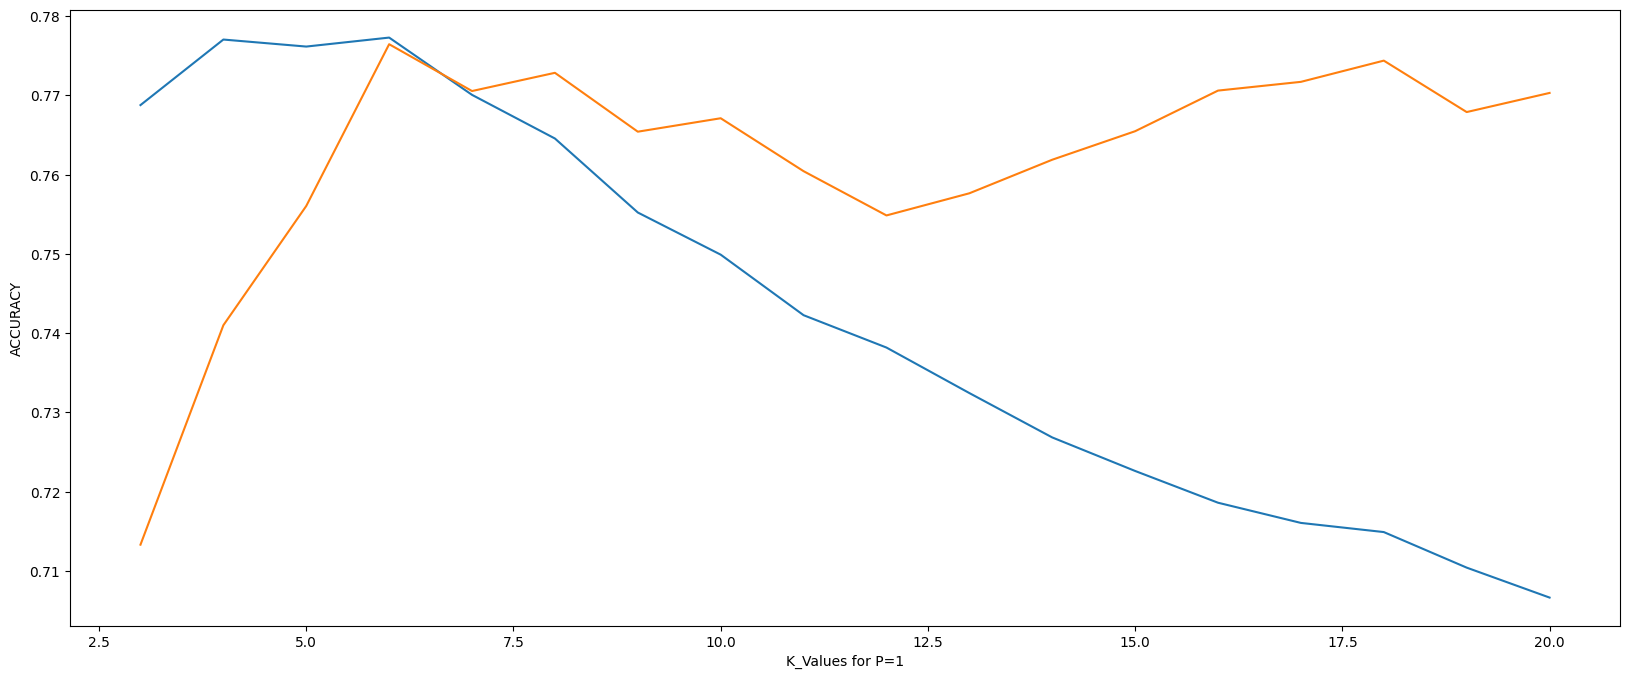

In [160]:
plt.figure(figsize=(20,8))
plt.plot(k_values,r2_train_list1)
plt.plot(k_values,r2_test_list1)
plt.xlabel('K_Values for P=1')
plt.ylabel("ACCURACY")

- Based on the plot you provided, which shows accuracy ( R 2 ) values for both training and testing datasets over different n_neighbors values in a K-Nearest Neighbors (KNN) regression model: Optimal Value for 𝑠 n_neighbors: The best n_neighbors value is likely around k=6, as this is where the test accuracy reaches its highest point.
- Overfitting and Underfitting: After 𝑘 = 6 k=6, the test accuracy decreases, which suggests that higher values of n_neighbors may lead to underfitting.

## Model training on Best n_neighbors=6....(As per above graph)

In [161]:
knn_reg_12 = KNeighborsRegressor(n_neighbors=6)
knn_reg_12.fit(std_x_test_df,y_test)

KNeighborsRegressor(n_neighbors=6)

### Testing Side for n_neighbors=6....>>>>>>

In [162]:
y_pred_knn_n = knn_reg_12.predict(std_x_test_df)
MSE_KNN = mean_squared_error(y_test,y_pred_knn_n)
print('Mean Square Error of KNN= ',MSE_KNN)
RMSE_KNN = np.sqrt(MSE_KNN)
print('Root Mean Square Error of KNN= ',RMSE_KNN)

R2_Score_KNN = r2_score(y_test,y_pred_knn_n)
print('R2_Score of KNN= ',R2_Score_KNN)  #N= x_test rows & P=x_test columns

Adjusted_R2_KNN = 1-(((1-R2_Score_KNN)*(x_test.shape[0]-1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R2 score of KNN= ",Adjusted_R2_KNN)
### Adjusted_R2_score formula= 1- (((1-R2)*(N-1)) / (N-P-1))

Mean Square Error of KNN=  34686608.3700355
Root Mean Square Error of KNN=  5889.533799040082
R2_Score of KNN=  0.8148339502065832
Adjusted R2 score of KNN=  0.8083746693998362


### Training Side for n_neighbors=6.?>>>>>>

In [163]:
y_pred_knn_n1 = knn_reg_12.predict(std_x_train_df)
MSE_KNN = mean_squared_error(y_train,y_pred_knn_n1)
print('Mean Square Error of KNN= ',MSE_KNN)
RMSE_KNN = np.sqrt(MSE_KNN)
print('Root Mean Square Error of KNN= ',RMSE_KNN)

R2_Score_KNN = r2_score(y_train,y_pred_knn_n1)
print('R2_Score of KNN= ',R2_Score_KNN)  #N= x_test rows & P=x_test columns

Adjusted_R2_KNN = 1-(((1-R2_Score_KNN)*(x_test.shape[0]-1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R2 score of KNN= ",Adjusted_R2_KNN)
### Adjusted_R2_score formula= 1- (((1-R2)*(N-1)) / (N-P-1))

Mean Square Error of KNN=  51530161.101009816
Root Mean Square Error of KNN=  7178.451163099866
R2_Score of KNN=  0.6215765504007595
Adjusted R2 score of KNN=  0.6083757323914837


# Save Final KNN Model

In [164]:
import pickle

In [165]:
with open('KNN_Model_Insurance.pkl','wb')as file:
    pickle.dump(knn_reg_12,file)  #knn_reg_12 ,for n_neighbors=6 gives best testing accracy so ....

In [184]:
with open('KNN_Model_Insurance.pkl','rb')as file:
    knn_pickle = pickle.load(file)

In [166]:
with open('Std_Scaler.pkl','wb')as file:
    pickle.dump(std_scaler,file)  #When user input give so later , we can convert it to StandardScaler()...
# std_scaler is object of StandardScaler()

In [167]:
x.shape  ##Independnet features in it while While model training 

(1337, 9)

In [168]:
knn_json = {'smoker':{'yes':1,'no':0},
           'columns':list(x.columns)}
knn_json

{'smoker': {'yes': 1, 'no': 0},
 'columns': ['children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest',
  'age_buckets',
  'risk',
  'weight']}

In [169]:
import json

In [170]:
with open('knn_encode_json.json',"w")as file:
    json.dump(knn_json,file)

# **Testing Single user input**

In [171]:
age=40
bmi=19
children=2
smoker='no'
region='southeast'
# Charges ???

In [174]:
print(column_names)

['children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'age_buckets', 'risk', 'weight']


In [185]:
column_names = knn_json['columns']
test_array = np.zeros(len(column_names))
test_array[0]=children
test_array[1]=knn_json['smoker'][smoker]
region_1 = "region_"+region
print(region_1)
Region_Index = column_names.index(region_1)
test_array[Region_Index] = 1
test_array[6] = 0 if age <18 else 1 if age <30 else 2 if age<45 else 3 if age<60 else 4 #Write as it is whene creating Buckets 
test_array[7] = 1 if age >60 else 0
test_array[8] = 1 if bmi >25 else 0
test_array

region_southeast


array([2., 0., 0., 0., 1., 0., 2., 0., 0.])

In [186]:
# bins=[0,18,30,45,60,np.inf] # For age_buckets
# labels=[0,1,2,3,4]
# df2['risk']=np.where(df2['age_buckets'].isin([4]),1,0)
# df2['bmi'].apply(lambda x:1 if x>25 else 0)

In [187]:
std_array1 = std_scaler.transform([test_array])
std_array1

array([[ 0.73735247, -0.50175337, -0.56258552, -0.57122914,  1.63509618,
        -0.56402639, -0.19558444, -0.30868574, -2.07173338]])

In [188]:
Charges_Prediction = knn_pickle.predict(std_array1)[0]  ##Pickle_knn model
print('\"Your Medical Insurance Charges are\"=',np.around(Charges_Prediction,2))

"Your Medical Insurance Charges are"= 5521.81


- In Linear Regression Model I got R2_Score Accuracy of "0.78" in Testing Side ,Whereas In KNN Model I get R2_Score Accuracy of "0.83" in Testing Side
- For Same above user input I get Insurance Charges as 4743/-Rs in Linear Regression Model ,But in case of KNN Model I get Insurance Charges as 5521/-Rs for same user input

### **Summary: So we should have to check all algorithms, Whichever algorithm gives best Accuracy we should select that algorithm for our Best Model...**

## ***KNN_Model Testing By User Input()***

In [189]:
def KNN_input(*args):
    age = int(input('Enter your age:'))
    bmi = int(input("Enter your BMI:"))
    children = int(input('How many childrens do you have?:'))
    smoker = input('Are you smoker? [yes/no]:').strip().lower()
    region = input("Enter your region:").strip().lower()

    column_names1 = knn_json['columns']
    array2=np.zeros(len(column_names1))
    array2[0] = children
    array2[1] = knn_json['smoker'][smoker]
    region_find = 'region_'+region
    index_region = column_names1.index(region_find)
    array2[index_region] = 1
    array2[6] = 0 if age<18 else 1 if age <30 else 2 if age<45 else 3 if age<60 else 4
    array2[7] = 1 if age>60 else 0
    array2[8] = 1 if bmi >25 else 0
    transform_array_input = std_scaler.transform([array2])  #Transform input to StandardScaler()....
    predict_1 = knn_pickle.predict(transform_array_input) #Pickle file read
    print()
    return f"Your Medical Insurance Charges are = {(np.around(predict_1,2)[0])}"
KNN_input()

Enter your age: 40
Enter your BMI: 19
How many childrens do you have?: 2
Are you smoker? [yes/no]: no
Enter your region: southeast


'Your Medical Insurance Charges are = 5521.81'